# Master in Artificial Intelligence & Data Science Edizione 2024
## Modulo "Programming with Python (Lupia) - A.A. 2023/2024"
### Davide Tagliaferri - Matricola 259772 

#### Il Dataset utilizzato in questo esercizio è il "Bank Churn Dataset" disponibile sulla piattaforma Kaggle.
#### Il link dove è stato scaricato è il seguente:
##### - https://www.kaggle.com/datasets/rangalamahesh/bank-churn?select=train.csv
    
#### Ci si pone l'obiettivo di trovare il miglior modello utile a predirre quale cliente abbandonerà il proprio rapporto con la banca date le variabili a disposizione.

#### Le librerie utilizzate in questo elaborato sono le seguenti:

In [1]:
import pandas as pd
import numpy as np
from classe_davide import Classe_Davide
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import folium
from folium.plugins import MarkerCluster
import geopy
import math
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from numpy import NaN
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from joblib import dump, load

#### Tramite il seguente comando ho creato il file requirements contenuto nello zip inviato: 
##### - !pip freeze > requirements.txt

#### Importo il dataset e do uno sguardo alla sua dimensionalità:

In [2]:
df_train = pd.read_csv("/Users/davide/Desktop/prj_python/train.csv")
obs = df_train.shape[0]
var = df_train.shape[1]
print(f"Sono presenti {obs} osservazioni e {var} colonne nel dataset di train")

Sono presenti 165034 osservazioni e 14 colonne nel dataset di train


In [3]:
df_test = pd.read_csv("/Users/davide/Desktop/prj_python/test.csv")
obs = df_test.shape[0]
var = df_test.shape[1]
print(f"Sono presenti {obs} osservazioni e {var} colonne nel dataset di test")

Sono presenti 110023 osservazioni e 13 colonne nel dataset di test


#### Diamo uno sguardo al nostro dataset e alle caratteristiche delle variabili che lo compongono, sia numeriche che alfanumeriche:

In [4]:
df_train.head(3)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      0.0              2        1.0             0.0        181449.97       0  
1      0.0              2        1.0             1.0         49503.50       0  
2      0.0              2        1.0             0.0        184866.69       0

In [5]:
df_test.head(3) #manca variabile target

id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898  Lucchese          586    France  Female  23.0       2   
1  165035    15782418      Nott          683    France  Female  46.0       2   
2  165036    15807120        K?          656    France  Female  34.0       7   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0      0.0              2        0.0             1.0        160976.75  
1      0.0              1        1.0             0.0         72549.27  
2      0.0              2        1.0             0.0        138882.09

#### Ottengo misure di sintesi per le variabili numeriche:

In [6]:
df_train.describe().T

count          mean           std          min  \
id               165034.0  8.251650e+04  47641.356500         0.00   
CustomerId       165034.0  1.569201e+07  71397.816791  15565701.00   
CreditScore      165034.0  6.564544e+02     80.103340       350.00   
Age              165034.0  3.812589e+01      8.867205        18.00   
Tenure           165034.0  5.020353e+00      2.806159         0.00   
Balance          165034.0  5.547809e+04  62817.663278         0.00   
NumOfProducts    165034.0  1.554455e+00      0.547154         1.00   
HasCrCard        165034.0  7.539537e-01      0.430707         0.00   
IsActiveMember   165034.0  4.977702e-01      0.499997         0.00   
EstimatedSalary  165034.0  1.125748e+05  50292.865585        11.58   
Exited           165034.0  2.115988e-01      0.408443         0.00   

                         25%         50%           75%          max  
id                  41258.25     82516.5  1.237748e+05    165033.00  
CustomerId       15633141.00  15690169.0  1.575682e+07  15815690.00  
CreditScore           597.00       659.0  7.100000e+02       850.00  
Age                    32.00        37.0  4.200000e+01        92.00  
Tenure                  3.00         5.0  7.000000e+00        10.00  
Balance                 0.00         0.0  1.199395e+05    250898.09  
NumOfProducts           1.00         2.0  2.000000e+00         4.00  
HasCrCard               1.00         1.0  1.000000e+00         1.00  
IsActiveMember          0.00         0.0  1.000000e+00         1.00  
EstimatedSalary     74637.57    117948.0  1.551525e+05    199992.48  
Exited                  0.00         0.0  0.000000e+00         1.00

#### Stesso procedimento per le variabili alfanumeriche:

In [7]:
df_train.describe(include=object).T

count unique     top   freq
Surname    165034   2797    Hsia   2456
Geography  165034      3  France  94215
Gender     165034      2    Male  93150

#### Creo istanza della classe personale contentuta nel pgm "classe_davide.py":

In [8]:
istanza = Classe_Davide(df_train)

#### Verifico presenza di valori nan nel dataset:

In [9]:
print(istanza.verifica_nan())

Non ci sono valori NaN nel dataset in input.
[]


#### Separo le variabili numeriche dalle alfanumeriche:

In [10]:
print(istanza.split_dataset())

La prima lista contiene le variabili numeriche, la seconda le categoriche.
(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], ['Surname', 'Geography', 'Gender'])


#### Faccio un check visivo del passaggio precedente sul fatto che le variabili effettivamente non contengano valori nan; l'analisi conferma la non presenza di valori nan:

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Inizio step analisi esplorativa delle variabili

#### Ottengo la percentuale delle occorrenze sulla variabile target:

In [12]:
df_train['Exited'].value_counts()/df_train.shape[0] 

0    0.788401
1    0.211599
Name: Exited, dtype: float64

#### Analizzo la distribuzione della variabile Geography:

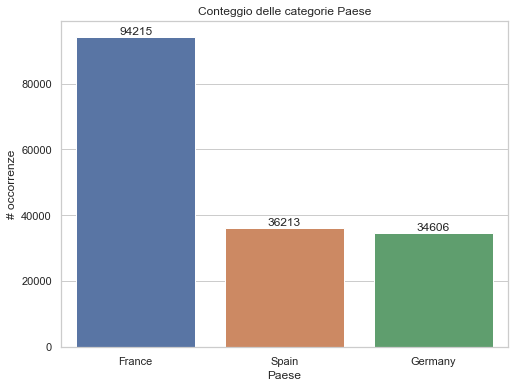

In [13]:
# Calcolo il conteggio delle categorie
count_geo = df_train['Geography'].value_counts()
# Grafico a barre
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6)) 
# Creazione del grafico a barre
barplot = sns.barplot(x=count_geo.index, y=count_geo.values)
# Aggiunta etichette dati
for index, value in enumerate(count_geo):
    barplot.text(index, value, str(value), ha='center', va='bottom')
# Aggiunta label
plt.title('Conteggio delle categorie Paese')
plt.xlabel('Paese')
plt.ylabel('# occorrenze')
# Visualizzo il grafico
plt.show()

#### Creo una mappa per visualizzare graficamente la variabile Geography tramite libreria folium.
#### Cliccando sul marker compaiono i totali delle occorrenze nel dataset:

In [14]:
locator = Nominatim( user_agent="Programming with Python" )
geocode = RateLimiter( locator.geocode, min_delay_seconds=1 )
reverse = RateLimiter( locator.reverse, min_delay_seconds=1 )

df_geo = df_train['Geography'].value_counts().reset_index().copy()
df_geo.columns = ['Geography', 'Conteggio']

df_geo["Latitudine"] = pd.Series([])
df_geo["Longitudine"] = pd.Series([])

def fixRighe( row ):
    location = geocode(f"{row.Geography}")
    if location is not None:
      row.Latitudine = location.latitude
      row.Longitudine = location.longitude
    else :
      print("Paese non trovato")
    return row

df_geo = df_geo.apply( fixRighe, axis=1)
mappa = folium.Map( location=(46.603354,1.888334), zoom_start=5 )
for index, paese in df_geo.iterrows():
  folium.Marker( location=( paese.Latitudine, paese.Longitudine), popup=f"{paese.Conteggio}" ).add_to( mappa )
mappa 

#### Distribuzione variabile genere:

<AxesSubplot:title={'center':'Distribuzione della variabile Genere'}, ylabel='Gender'>

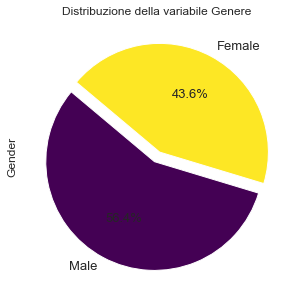

In [15]:
kwargs = dict(
    startangle = 140,
    colormap   = 'viridis',
    fontsize   = 13,
    explode    = (0.05,0.05),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Distribuzione della variabile Genere'
)
df_train['Gender'].value_counts().plot.pie(**kwargs)

#### Ottengo nei seguenti grafici le frequenze totali sulle seguenti categorie:
#### - Tipologie di prodotti bancari
#### - Se il cliente possiede una carta di credito (1 si, 0 no)
#### - Se il cliente risulta attivo (1 si, 0 no) 

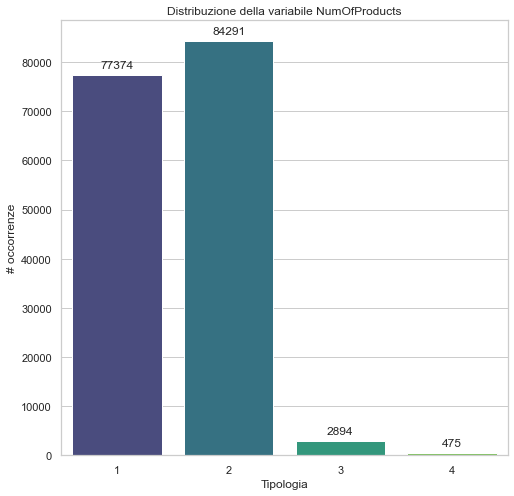

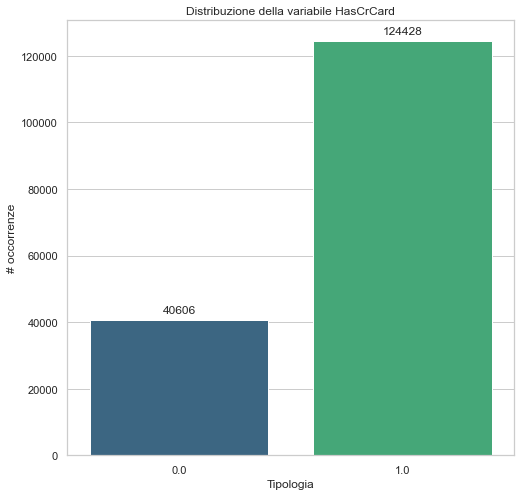

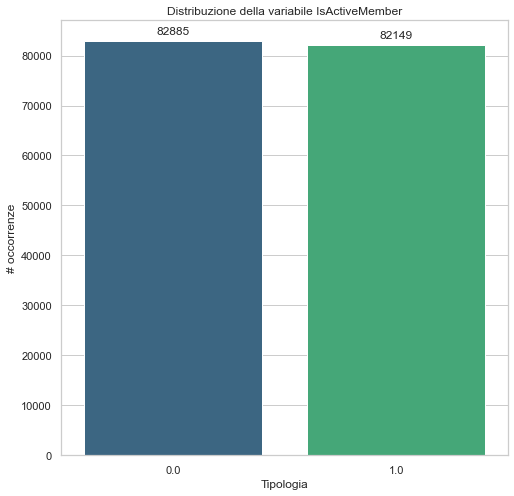

In [16]:
for var in ["NumOfProducts", "HasCrCard", "IsActiveMember"]:
    # Grafico a barre con Seaborn
    plt.figure(figsize=(8, 8))  # Dimensioni della figura
    ax = sns.countplot(x=df_train[var], data=df_train, palette='viridis')  # countplot per la variabile nominale numerica
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    # Aggiunta di elementi estetici
    plt.title(f'Distribuzione della variabile {var}')
    plt.xlabel('Tipologia')
    plt.ylabel('# occorrenze')

    # Visualizza il grafico
    plt.show()

#### Per analizzare la distribuzione delle variabili numeriche utilizzo il boxenplot, variante più dettagliata del box plot che mostra un maggior numero di quantili:

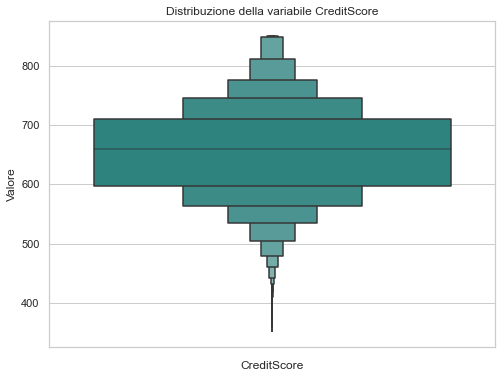

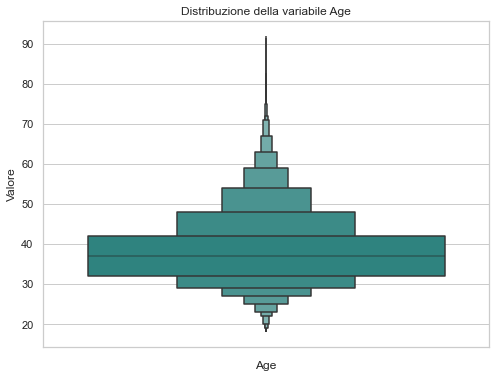

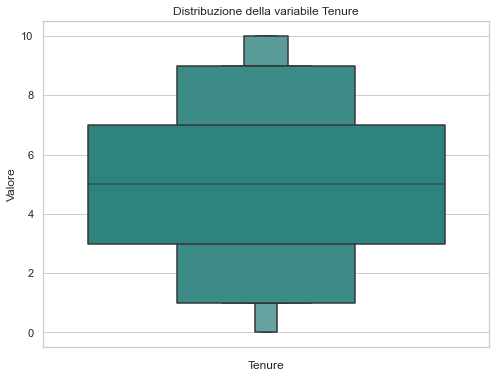

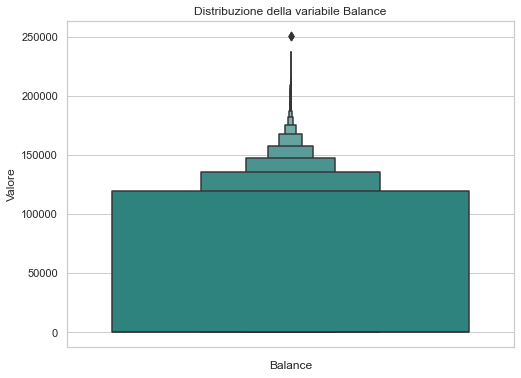

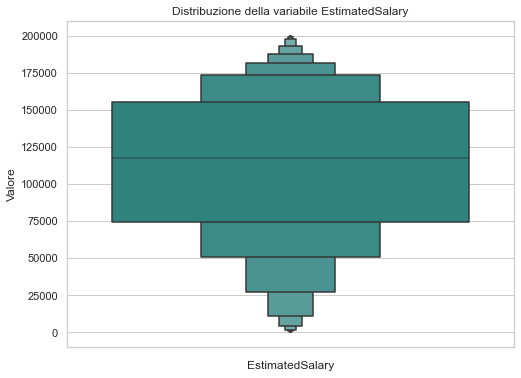

In [17]:
for var in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    plt.figure(figsize=(8, 6))  # Dimensioni della figura
    sns.boxenplot(y=df_train[var], data=df_train, palette='viridis')  # boxenplot per la variabile numerica
    plt.title(f'Distribuzione della variabile {var}')
    plt.xlabel(var)
    plt.ylabel('Valore')
    plt.show()

#### Sempre sulle variabili numeriche precedenti grafico la densità di probabilità delle stesse differenziandole per la variabile target (non si osservano andamenti anomali):

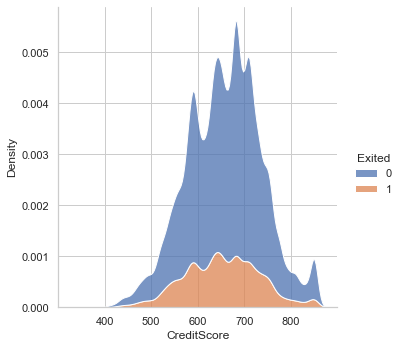

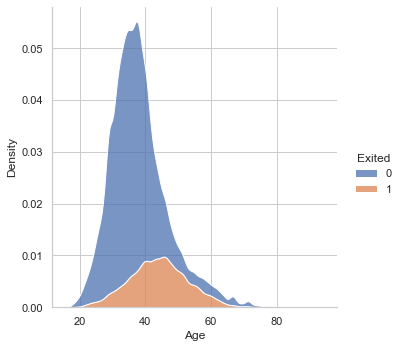

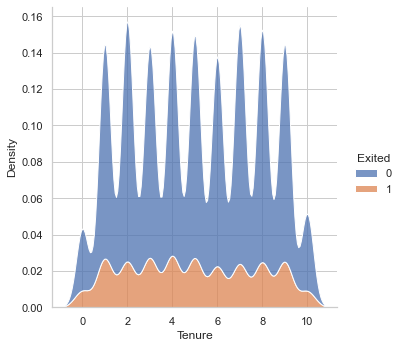

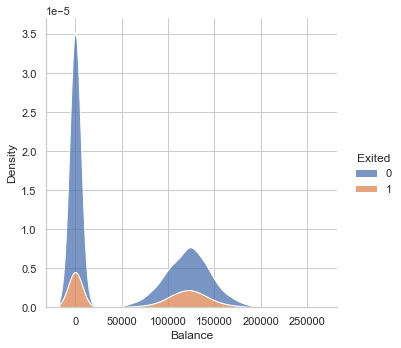

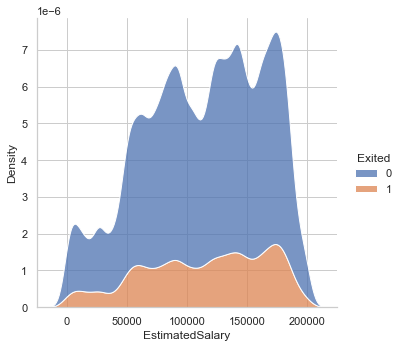

In [18]:
for var in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]: 
    sns.displot(df_train, x=df_train[var], hue="Exited", kind="kde", multiple="stack")

#### Infine eseguiamo l'analisi di correlazione tra le variabili numeriche. I valori più alti, ma comunque accettabili, si registrano tra:
#### - variabile target ed età
#### - variabile target  e situazione finanziaria
#### - situazione finanziaria ed età 

<AxesSubplot:>

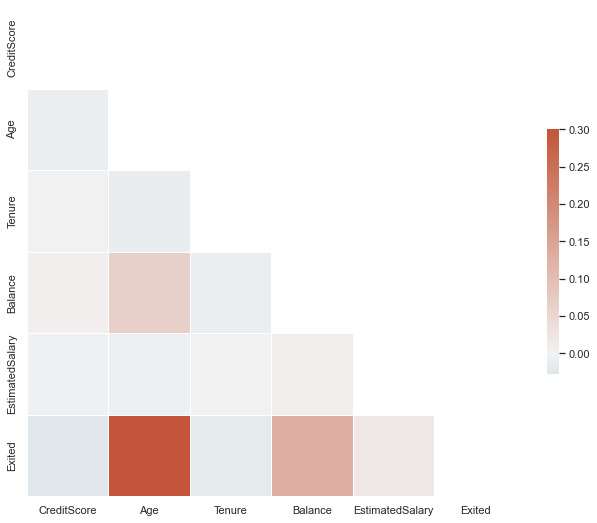

In [19]:
# Compute the correlation matrix
corr = df_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary","Exited"]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Implementazione modelli predittivi

#### Nel seguito verranno presentati i risultati dei seguenti 3 modelli supervisionati:
#### - regressione logistica
#### - rete neurale
#### - random forest

#### L'obiettivo è individuare quello che meglio predice il tasso di abbandono del cliente.

#### Prima di iniziare con l'implementazione degli algoritmi, raccolgo le variabili in 2 liste differenziandole tra categoriche e numeriche (utilizzo le liste ottenute dalla classe personale eseguita in precedenza); ciò mi sarà utile per applicare in seguito il column transformer e la standardizzazione sulle variabili:

In [20]:
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
all_features = numerical_features + categorical_features

#### Separo il dataset di train tra le X (non considero id, CustomerId e Surname in quanto non utili in termini predittivi e ovviamente la variabile target) e la y (solo variabile target):

In [21]:
y_train = df_train["Exited"]
df_train = df_train[all_features]

### Regressione logistica

#### Dichiaro trasformatori che applicherò sulle variabili:
#### - onehotencoder mi crea variabili dummy sulle categoriche
#### - MinMaxScaler mi standardizza le variabili (necessario farlo per la regressione logistica)

In [22]:
transformers = [
    ("one_hot", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("scaler", MinMaxScaler(),numerical_features)
    ]
ct = ColumnTransformer(transformers=transformers)

#### Definisco la pipeline:

In [23]:
steps = [("column_transformers", ct),
        ("model_log_regr", LogisticRegression(class_weight="balanced")),
        ]
pipeline = Pipeline(steps)

#### Applico una grid search per cercare il miglior modello ottenibile da tutte le possibili combinazioni frutto dei parametri passati in input:

In [24]:
param_space = {
    "model_log_regr__penalty":["l1","l2","elasticnet"],
    "model_log_regr__C":[0.1,0.5,1],
    "model_log_regr__max_iter":[5,10,100,1000]
}

#### Utilizzo in fase di addestramento la cross validation, la quale serve per valutare le prestazioni di un modello su dati non visti e per selezionare i migliori parametri del modello. Per farlo suddivide i dati in sottoinsiemi per addestrare e testare il modello più volte, fornendo stime affidabili delle prestazioni e aiutando a evitare l'overfitting:

In [25]:
grid_log_regr = GridSearchCV(pipeline, param_grid = param_space, cv=5, verbose=1)
grid_log_regr.fit(df_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformers',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'EstimatedSalary'])])),
                                       ('model_log_regr',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'model_log_regr__C': [0.1, 0.5, 1],
                         'model_log_regr__max_iter': [5, 10, 100, 1000],
                         'model_log_regr__penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

#### Visualizzo la miglior combinazione dei parametri ottenuta:

In [26]:
grid_log_regr.best_params_

{'model_log_regr__C': 1,
 'model_log_regr__max_iter': 100,
 'model_log_regr__penalty': 'l2'}

#### Salvo i risultati dell'addestramento in un dataframe:

In [27]:
results_log_regr = pd.DataFrame(grid_log_regr.cv_results_)
results_log_regr

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.147542      0.016470         0.000000        0.000000   
1        0.264086      0.024005         0.043184        0.007477   
2        0.170799      0.041813         0.000000        0.000000   
3        0.138196      0.000986         0.000000        0.000000   
4        0.316558      0.022741         0.042937        0.006415   
5        0.146147      0.009140         0.000000        0.000000   
6        0.140926      0.005495         0.000000        0.000000   
7        0.665353      0.026636         0.039475        0.004741   
8        0.139699      0.003193         0.000000        0.000000   
9        0.138338      0.001358         0.000000        0.000000   
10       0.652992      0.014860         0.040644        0.002293   
11       0.138836      0.004499         0.000000        0.000000   
12       0.136784      0.001300         0.000000        0.000000   
13       0.251056      0.019006         0.039010        0.000959   
14       0.141542      0.003830         0.000000        0.000000   
15       0.139825      0.001601         0.000000        0.000000   
16       0.291486      0.004860         0.038925        0.000995   
17       0.166434      0.012408         0.000000        0.000000   
18       0.145811      0.006598         0.000000        0.000000   
19       0.711995      0.098162         0.045480        0.008515   
20       0.156167      0.012048         0.000000        0.000000   
21       0.159960      0.007375         0.000000        0.000000   
22       0.739415      0.150565         0.043784        0.006714   
23       0.154681      0.028521         0.000000        0.000000   
24       0.145146      0.007892         0.000000        0.000000   
25       0.257968      0.007620         0.042561        0.005660   
26       0.143354      0.006268         0.000000        0.000000   
27       0.145038      0.005893         0.000000        0.000000   
28       0.306291      0.009156         0.042396        0.004687   
29       0.141095      0.004265         0.000000        0.000000   
30       0.142381      0.001959         0.000000        0.000000   
31       0.499512      0.016580         0.039891        0.003984   
32       0.153276      0.012547         0.000000        0.000000   
33       0.141549      0.004403         0.000000        0.000000   
34       0.485271      0.022325         0.039504        0.003351   
35       0.145089      0.006014         0.000000        0.000000   

   param_model_log_regr__C param_model_log_regr__max_iter  \
0                      0.1                              5   
1                      0.1                              5   
2                      0.1                              5   
3                      0.1                             10   
4                      0.1                             10   
5                      0.1                             10   
6                      0.1                            100   
7                      0.1                            100   
8                      0.1                            100   
9                      0.1                           1000   
10                     0.1                           1000   
11                     0.1                           1000   
12                     0.5                              5   
13                     0.5                              5   
14                     0.5                              5   
15                     0.5                             10   
16                     0.5                             10   
17                     0.5                             10   
18                     0.5                            100   
19                     0.5                            100   
20                     0.5                            100   
21                     0.5                           1000   
22                     0.5                           1000   
23                     

#### Assegno alla variabile "model_log_regr" il miglior modello ottenuto, applico poi il metodo predict per ottenere gli y predetti dal modello:

In [28]:
model_log_regr = grid_log_regr.best_estimator_
model_log_regr.predict(df_train)

array([0, 0, 0, ..., 0, 0, 0])

#### Per valutare il modello calcolo nel seguito il classification report, matrice di confusione e curva ROC:

In [29]:
print(classification_report(y_train,model_log_regr.predict(df_train)))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83    130113
           1       0.45      0.74      0.56     34921

    accuracy                           0.75    165034
   macro avg       0.68      0.75      0.69    165034
weighted avg       0.82      0.75      0.77    165034



#### Il classification report mi fornisce le seguenti informazioni:
#### - support, quanti casi vengono considerati per tirare ottenere le metriche
#### - precision, tutte le volte che il modello ha detto si quante volte era vero? (TP/TP+FP)
#### - recall, tutte le volte che il modello dice si rispetto però a tutte le volte che era effettivamente vero TP/TP+FN
#### - F1, misura che combina precision e recall

#### Salvo su un dataframe i risultati ottenuti:

In [30]:
tab_log_regr = pd.DataFrame(classification_report(y_train,model_log_regr.predict(df_train), output_dict=True))
tab_log_regr["modello"] = "Regressione_Logistica"
tab_log_regr

0             1  accuracy      macro avg  \
precision       0.914947      0.449974  0.753705       0.682461   
recall          0.758072      0.737436  0.753705       0.747754   
f1-score        0.829155      0.558909  0.753705       0.694032   
support    130113.000000  34921.000000  0.753705  165034.000000   

            weighted avg                modello  
precision       0.816560  Regressione_Logistica  
recall          0.753705  Regressione_Logistica  
f1-score        0.771971  Regressione_Logistica  
support    165034.000000  Regressione_Logistica

<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

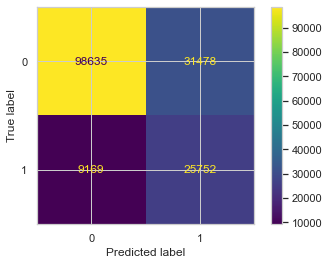

In [31]:
plot_confusion_matrix(model_log_regr,df_train,y_train)
plot_confusion_matrix

<function sklearn.metrics._plot.roc_curve.plot_roc_curve(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)>

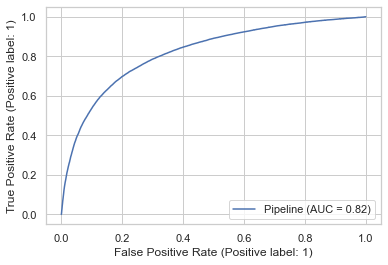

In [32]:
plot_roc_curve(model_log_regr,df_train,y_train)
plot_roc_curve

### Rete neurale

#### Implemento adesso una rete neurale; dato i tempi lunghi, almeno sul mio pc, dopo diversi tentativi ho trovato che una delle migliori combinazioni è la seguente:
##### - {'model_nn__hidden_layer_sizes': (10, 10),'model_nn__learning_rate_init': 0.001,'model_nn__max_iter': 75}
 
#### Riduco quindi per semplicità e velocità di esecuzione il param space dei parametri:

In [33]:
#costruisco pipeline (column transformer rimane lo stesso di prima)
steps = [("column_transformers", ct),
        ("model_nn", MLPClassifier())
        ]
pipeline = Pipeline(steps)
#Definisco grid search
param_space = {
    "model_nn__max_iter":[75],
    "model_nn__learning_rate_init":[0.001],
    "model_nn__hidden_layer_sizes":[(30,), (10,10)]
}
grid_nn = GridSearchCV(pipeline, param_grid = param_space, cv=5, verbose=1)
grid_nn.fit(df_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformers',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'EstimatedSalary'])])),
                                       ('model_nn', MLPClassifier())]),
             param_grid={'model_nn__hidden_layer_sizes': [(30,), (10, 10)],
                         'model_nn__learning_rate_init': [0.001],
                         'model_nn__max_iter': [75]},
             verbose=1)

In [34]:
grid_nn.best_params_

{'model_nn__hidden_layer_sizes': (10, 10),
 'model_nn__learning_rate_init': 0.001,
 'model_nn__max_iter': 75}

In [35]:
results_nn = pd.DataFrame(grid_nn.cv_results_)
results_nn

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      34.941409      3.183102         0.051855        0.007216   
1      35.394030      5.538062         0.063364        0.003899   

  param_model_nn__hidden_layer_sizes param_model_nn__learning_rate_init  \
0                              (30,)                              0.001   
1                           (10, 10)                              0.001   

  param_model_nn__max_iter                                             params  \
0                       75  {'model_nn__hidden_layer_sizes': (30,), 'model...   
1                       75  {'model_nn__hidden_layer_sizes': (10, 10), 'mo...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.866574           0.862211           0.864877           0.861817   
1           0.867149           0.862272           0.866937           0.863150   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.863146         0.863725        0.001773                2  
1           0.864237         0.864749        0.001975                1

In [36]:
model_nn = grid_nn.best_estimator_
model_nn.predict(df_train)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
print(classification_report(y_train,model_nn.predict(df_train)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    130113
           1       0.77      0.52      0.62     34921

    accuracy                           0.86    165034
   macro avg       0.82      0.74      0.77    165034
weighted avg       0.86      0.86      0.85    165034



In [38]:
tab_nn = pd.DataFrame(classification_report(y_train,model_nn.predict(df_train), output_dict=True))
tab_nn["modello"] = "Rete_neurale"
tab_nn

0             1  accuracy      macro avg  \
precision       0.881443      0.765030  0.864688       0.823237   
recall          0.957107      0.520346  0.864688       0.738726   
f1-score        0.917718      0.619399  0.864688       0.768558   
support    130113.000000  34921.000000  0.864688  165034.000000   

            weighted avg       modello  
precision       0.856810  Rete_neurale  
recall          0.864688  Rete_neurale  
f1-score        0.854594  Rete_neurale  
support    165034.000000  Rete_neurale

<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

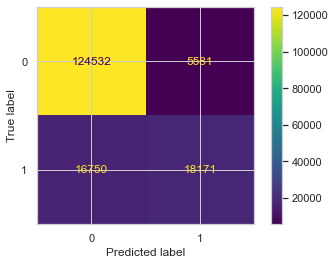

In [39]:
plot_confusion_matrix(model_nn,df_train,y_train)
plot_confusion_matrix

<function sklearn.metrics._plot.roc_curve.plot_roc_curve(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)>

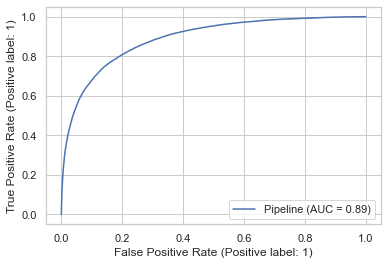

In [40]:
plot_roc_curve(model_nn,df_train,y_train)
plot_roc_curve

### Randon Forest

#### Come ultimo modello applico una Random Forest:

In [41]:
transformers2 = [
    ("one_hot", OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
ct2 = ColumnTransformer(transformers=transformers2)

#costruisco pipeline
steps = [("column_transformers", ct2),
        ("model_rf", RandomForestClassifier())
        ]
pipeline = Pipeline(steps)
#Definisco grid search
param_space = {
    "model_rf__n_estimators":[150,200],
    "model_rf__max_leaf_nodes":[10,15],
    "model_rf__class_weight":["balanced"]
}
grid_rf = GridSearchCV(pipeline, param_grid = param_space, cv=5, verbose=1)
grid_rf.fit(df_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformers',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('model_rf', RandomForestClassifier())]),
             param_grid={'model_rf__class_weight': ['balanced'],
                         'model_rf__max_leaf_nodes': [10, 15],
                         'model_rf__n_estimators': [150, 200]},
             verbose=1)

In [42]:
grid_rf.best_params_

{'model_rf__class_weight': 'balanced',
 'model_rf__max_leaf_nodes': 10,
 'model_rf__n_estimators': 150}

In [43]:
results_rf = pd.DataFrame(grid_rf.cv_results_)
results_rf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.295141      0.103225         0.309712        0.001329   
1       5.643476      0.035243         0.403250        0.002243   
2       4.274462      0.080992         0.309183        0.001055   
3       6.342232      0.756365         0.515213        0.214013   

  param_model_rf__class_weight param_model_rf__max_leaf_nodes  \
0                     balanced                             10   
1                     balanced                             10   
2                     balanced                             15   
3                     balanced                             15   

  param_model_rf__n_estimators  \
0                          150   
1                          200   
2                          150   
3                          200   

                                              params  split0_test_score  \
0  {'model_rf__class_weight': 'balanced', 'model_...           0.551944   
1  {'model_rf__class_weight': 'balanced', 'model_...           0.551944   
2  {'model_rf__class_weight': 'balanced', 'model_...           0.551944   
3  {'model_rf__class_weight': 'balanced', 'model_...           0.551944   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.554398            0.55564           0.553367           0.549446   
1           0.554398            0.55564           0.553367           0.549446   
2           0.554398            0.55564           0.553367           0.549446   
3           0.554398            0.55564           0.553367           0.549446   

   mean_test_score  std_test_score  rank_test_score  
0         0.552959        0.002135                1  
1         0.552959        0.002135                1  
2         0.552959        0.002135                1  
3         0.552959        0.002135                1

In [44]:
model_rf = grid_rf.best_estimator_
model_rf.predict(df_train)

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
print(classification_report(y_train,model_rf.predict(df_train)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64    130113
           1       0.28      0.73      0.41     34921

    accuracy                           0.55    165034
   macro avg       0.58      0.62      0.53    165034
weighted avg       0.75      0.55      0.59    165034



In [46]:
tab_rf = pd.DataFrame(classification_report(y_train,model_rf.predict(df_train), output_dict=True))
tab_rf["modello"] = "Random_Forest"
tab_rf

0             1  accuracy      macro avg  \
precision       0.875914      0.284378  0.552959       0.580146   
recall          0.504438      0.733742  0.552959       0.619090   
f1-score        0.640191      0.409893  0.552959       0.525042   
support    130113.000000  34921.000000  0.552959  165034.000000   

            weighted avg        modello  
precision       0.750746  Random_Forest  
recall          0.552959  Random_Forest  
f1-score        0.591460  Random_Forest  
support    165034.000000  Random_Forest

<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

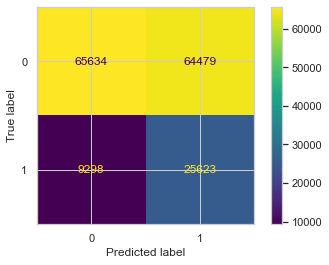

In [47]:
plot_confusion_matrix(model_rf,df_train,y_train)
plot_confusion_matrix

<function sklearn.metrics._plot.roc_curve.plot_roc_curve(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)>

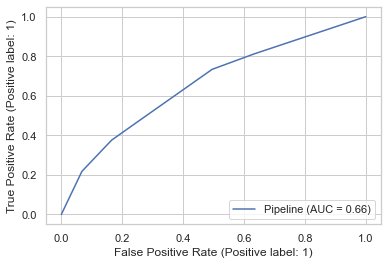

In [48]:
plot_roc_curve(model_rf,df_train,y_train)
plot_roc_curve

## Sintesi risultati
#### Unisco i risultati ottenuti dai 3 modelli in un unico dataframe:

In [56]:
results = pd.concat([tab_log_regr, tab_nn, tab_rf])
results.loc[:,["modello","weighted avg"]].drop("support").reset_index().rename(columns={'index': 'Metrica'}).sort_values(by='Metrica')

Metrica                modello  weighted avg
2   f1-score  Regressione_Logistica      0.771971
5   f1-score           Rete_neurale      0.854594
8   f1-score          Random_Forest      0.591460
0  precision  Regressione_Logistica      0.816560
3  precision           Rete_neurale      0.856810
6  precision          Random_Forest      0.750746
1     recall  Regressione_Logistica      0.753705
4     recall           Rete_neurale      0.864688
7     recall          Random_Forest      0.552959

### Conclusioni

#### Dai risultati ottenuti possiamo dedurre che il modello che presenta le peggiori performance è sicuramente quello della random forest. 
#### La rete neurale è quella che ottiene score migliori rispetto alla regressione logistica per le misure di sintesi ottenute dal classification report e dal valore della curva AUC.
#### Tuttavia, analizzando la distribuzione della matrice di confusione, notiamo che la rete neurale sbaglia molti casi nel predirre la true label (pari a 1) andando a predirre un valore di non uscita del cliente (pari a 0): questo rettangolo è quello situato in basso a sinistra nella matrice con valore pari a 15.077 (contro un valore di 9.159 della regressione logistica). Di contro le basse performance della regressione logistica rispetto la rete neurale dipendono dai maggiori errori che avvengono nel quadrante in alto a destra pari a 31.478 (contro un valore di 7.252 della rete neurale): il modello associa la label "Exited" a cliente che in realtà non abbandoneranno la banca.
#### Poichè l'errore che compie la rete neurale (non predirre correttamente chi abbandonerà la banca) ha per i nostri scopi ed analisi una rilevanza maggiore, scegliamo a valle di quanto detto come modello finale la regressione logistica. 

### Possibili applicazioni

#### Una volta ottenuto il modello, questo può essere utilizzato in un'ambiente di produzione per andare a predirre quali clienti, ancora attivi, cesseranno il proprio rapporto con la banca.

#### Per simulare questo utilizzo, salviamo il modello trovato nella cartella di progetto, lo ricarichiamo e lo applichiamo al dataset di test (il preprocessing dei dati, OneHotEncoder e standardizzazione, avviene in automatico nel metodo predict):

In [57]:
dump(grid_log_regr.best_estimator_, "best_model.pki") #salvataggio

['best_model.pki']

In [58]:
model_loaded = load("best_model.pki")

In [59]:
y_test = model_loaded.predict(df_test)
y_test

array([0, 1, 0, ..., 0, 0, 1])

#### Creo una copia di df_test con y_test come nuova colonna per future analisi, ad esempio azioni di fedelizzazione preventive sulla clientela:

In [60]:
df_test_y_pred = df_test.assign(y_test=y_test)
df_test_y_pred.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        0.0             1.0        160976.75   
1       0.00              1        1.0             0.0         72549.27   
2       0.00              2        1.0             0.0        138882.09   
3       0.00              1        1.0             0.0        113931.57   
4  121263.62              1        1.0             0.0        139431.00   

   y_test  
0       0  
1       1  
2       0  
3       0  
4       1

# Grazie per l'attenzione!